# 数据加载及处理

`Ascend` `GPU` `CPU` `入门` `数据准备`

[![在线运行](https://gitee.com/mindspore/docs/raw/master/resource/_static/logo_modelarts.png)](https://authoring-modelarts-cnnorth4.huaweicloud.com/console/lab?share-url-b64=aHR0cHM6Ly9taW5kc3BvcmUtd2Vic2l0ZS5vYnMuY24tbm9ydGgtNC5teWh1YXdlaWNsb3VkLmNvbS9ub3RlYm9vay9tb2RlbGFydHMvcXVpY2tfc3RhcnQvbWluZHNwb3JlX2RhdGFzZXQuaXB5bmI=&imageid=65f636a0-56cf-49df-b941-7d2a07ba8c8c)&emsp;[![下载Notebook](https://gitee.com/mindspore/docs/raw/master/resource/_static/logo_notebook.png)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/master/tutorials/zh_cn/mindspore_dataset.ipynb)&emsp;[![下载样例代码](https://gitee.com/mindspore/docs/raw/master/resource/_static/logo_download_code.png)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/master/tutorials/zh_cn/mindspore_dataset.py)&emsp;[![查看源文件](https://gitee.com/mindspore/docs/raw/master/resource/_static/logo_source.png)](https://gitee.com/mindspore/docs/blob/master/tutorials/source_zh_cn/beginner/dataset.ipynb)

数据集类为用户提供了常用的数据处理接口，使得用户能够快速进行数据处理操作。[mindspore.dataset](https://www.mindspore.cn/docs/api/zh-CN/master/api_python/mindspore.dataset.html)提供了部分常用数据集和标准格式数据集的加载接口，对于图像数据集，用户可使用[MindVision](https://gitee.com/mindspore/vision)来加载数据集。MindVision是在`mindspore.dataset`的基础上开发的接口，除提供数据集加载功能外，MindVision还提供数据集下载功能、数据处理和数据增强功能。本章首先介绍如何使用`mindvision.classification.dataset.Cifar10`接口加载并处理CIFAR-10数据集，然后介绍如何使用`mindspore.dataset.GeneratorDataset`实现自定义数据集加载。

## 加载数据集

下面的样例通过`mindvision.classification.dataset.Cifar10`接口加载CIFAR-10数据集，CIFAR-10数据集共有60000张32*32的彩色图像，分为10个类别，每类有6000张图，数据集中一共有50000张训练图片和10000张测试图片。`Cifar10`接口提供CIFAR-10数据集下载及加载功能。

+ `path`：数据集根目录位置。
+ `split`：训练、测试或推理数据集，可选`train`，`test`或 `infer`，默认为`train`。
+ `download`：是否下载数据集，设置`True`时，若数据集不存在可下载并解压数据集，默认为`False`。


In [22]:
from mindvision.classification.dataset import Cifar10

# 数据集根目录
data_dir = "./datasets"
# 下载解压并加载CIFAR-10训练数据集
dataset = Cifar10(path=data_dir, split='train', download=True)
dataset = dataset.run()

CIFAR-10数据集文件的目录结构如下：

```text
datasets/
├── cifar-10-batches-py
│   ├── batches.meta
│   ├── data_batch_1
│   ├── data_batch_2
│   ├── data_batch_3
│   ├── data_batch_4
│   ├── data_batch_5
│   ├── readme.html
│   └── test_batch
└── cifar-10-python.tar.gz
```

## 迭代数据集

用户可以用`create_dict_iterator`接口创建数据迭代器，迭代访问数据。访问的数据类型默认为`Tensor`；若设置`output_numpy=True`，访问的数据类型为`Numpy`。下面展示了对应访问的数据类型、图片的形状和标签。

In [23]:
data = next(dataset.create_dict_iterator())
print(f"Data type:{type(data['image'])}\nImage shape: {data['image'].shape}, Label: {data['label']}")

data = next(dataset.create_dict_iterator(output_numpy=True))
print(f"Data type:{type(data['image'])}\nImage shape: {data['image'].shape}, Label: {data['label']}")

Data type:<class 'mindspore.common.tensor.Tensor'>
Image shape: (32, 3, 224, 224), Label: [6 8 5 5 3 2 6 6 1 5 1 7 1 8 6 1 6 1 0 6 7 3 2 2 8 2 4 5 7 3 3 9]
Data type:<class 'numpy.ndarray'>
Image shape: (32, 3, 224, 224), Label: [3 8 7 3 9 8 3 0 1 0 5 2 1 5 7 9 3 3 1 1 2 0 1 0 9 1 8 2 3 2 6 7]


## 数据处理及增强

### 数据处理

`mindvision.classification.dataset.Cifar10`接口提供数据处理功能，只要设置相应的属性即可对数据进行处理操作。

+ `shuffle`：是否打乱数据集的顺序，设置为`True`时打乱数据集的顺序，默认为`False`。

+ `batch_size`：每组包含的数据个数，`batch_size=2`设置每组包含2个数据， `batch_size`值默认大小为32。

+ `repeat_num`：重复数据集的个数，`repeat_num=1`即一份数据集，`repeat_num`值默认为1 。

下面的样例实现将数据集随机打乱顺序并将样本两两组成一个批次的功能。

In [4]:
dataset = Cifar10(data_dir, batch_size=2, shuffle=True, repeat_num=1)
data = dataset.run()
data = next(data.create_dict_iterator())
print(f"Image shape: {data['image'].shape}, Label: {data['label']}")

Image shape: (2, 3, 224, 224) , Label: [5 0]


### 数据增强

数据量过小或是样本场景单一等问题会影响模型的训练效果，用户可以通过数据增强操作扩充样本多样性，从而提升模型的泛化能力。
`mindvision.classification.dataset.Cifar10`接口使用默认的数据增强功能，用户可通过设置属性`transform`和`target_transform`进行数据增强操作。

+ `transform`：对数据集图像数据进行增强。
+ `target_transform`：对数据集标签数据进行处理。

本节介绍使用`mindspore.dataset.vision.c_transforms`模块中的算子对CIFAR-10数据集进行数据增强。

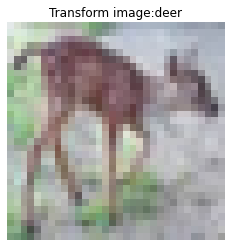

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import mindspore.dataset.vision.c_transforms as transforms

# 图像增强
trans = [
    # 对图像进行随机水平翻转
    transforms.RandomHorizontalFlip(prob=0.5),
    # (h, w, c)转换为(c, h, w)
    transforms.HWC2CHW()
]
dataset = Cifar10(data_dir, transform=trans)
data_trans = dataset.run()
data_trans = next(data_trans.create_dict_iterator(output_numpy=True))
image_trans = data_trans["image"][0]

# 绘制图像增强图
image_trans = np.transpose(image_trans, (1, 2, 0))
plt.imshow(image_trans)
index = data_trans['label'][0]
plt.title(f"Transform image:{dataset.index2label[index]}")
plt.axis("off")
plt.show()

## 自定义数据集

对于MindSpore暂不支持直接加载的数据集，可以构造自定义数据集类，然后通过`mindspore.dataset.GeneratorDataset`接口实现自定义方式的数据加载。其中用户需要自定义的类函数如下：

+ `__init__`：定义数据初始化等操作，在实例化数据集对象时被调用。

+ `__getitem__`：定义该函数后可使其支持随机访问，能够根据给定的索引值`index`，获取数据集中的数据并返回。数据返回值类型是由NumPy数组组成   的Tuple。
+ `__len__`：返回数据集的样本数量。

示例如下，定义数据集类`DatasetGenerator`之后，就可以通过`GeneratorDataset`接口按照用户定义的方式加载并访问数据集样本。

In [2]:
import numpy as np
import mindspore.dataset as ds

np.random.seed(58)

class DatasetGenerator:
    '''自定义数据集'''
    def __init__(self):
        self.data = np.random.sample((5, 2))
        self.label = np.random.sample((5, 1))

    def __getitem__(self, index):
        return self.data[index], self.label[index]

    def __len__(self):
        return len(self.data)

dataset_generator = DatasetGenerator()
# 加载数据集
dataset = ds.GeneratorDataset(dataset_generator, ["data", "label"], shuffle=False)
# 迭代访问数据集
for data in dataset.create_dict_iterator():
    print(f"data: {data['data']}, label:{data['label']}")

data: [0.36510558 0.45120592], label:[0.78888122]
data: [0.49606035 0.07562207], label:[0.38068183]
data: [0.57176158 0.28963401], label:[0.16271622]
data: [0.30880446 0.37487617], label:[0.54738768]
data: [0.81585667 0.96883469], label:[0.77994068]
